<a href="https://colab.research.google.com/github/harishmuh/machine_learning_practices/blob/main/Exercise_Agglomerative_and_DBScan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
**Exercise: Agglomerative Clustering & DBScan** `Mall customer data`
---



**Study case:** `Mall_Customers.csv`


**Instruction**

**Obtaining insights from the data**

- Perform EDA to understand the dataset.
- Explain the insights gained from the EDA!


**Preprocessing Clustering**
- For clustering, simply drop the 'CustomerID' and 'Gender' features. From the remaining three features, select the best combination of the two features to be used for clustering.
- Perform scaling using StandardScaler, then use the K-Means, Agglomerative clustering, and DBScan methods. Find the optimal number of clusters for each method.

**Evaluation**
- Compare the results of the three methods tested. Which method is best?
- Interpret the clustering results!

## **Import libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, ward, complete, average

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')

## **Load & explore dataset**

In [ ]:
# Loading dataset
url = 'https://raw.githubusercontent.com/harishmuh/machine_learning_practices/refs/heads/main/datasets/Mall_Customers.csv'
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Rename columns
df = df.rename(columns={'Spending Score (1-100)': 'Spending Score',
        'Annual Income (k$)': 'Annual Income'})

In [ ]:
# Drop customerID column
df.drop('CustomerID', axis=1, inplace=True)

In [ ]:
# Data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          200 non-null    object
 1   Age             200 non-null    int64 
 2   Annual Income   200 non-null    int64 
 3   Spending Score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [ ]:
# Statistical description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income,200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


In [ ]:
# Missing values
df.isna().sum().to_frame('missing values')

,missing values
Gender,0
Age,0
Annual Income,0
Spending Score,0


## **Exploratory Data Analysis**

In [ ]:
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 20

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

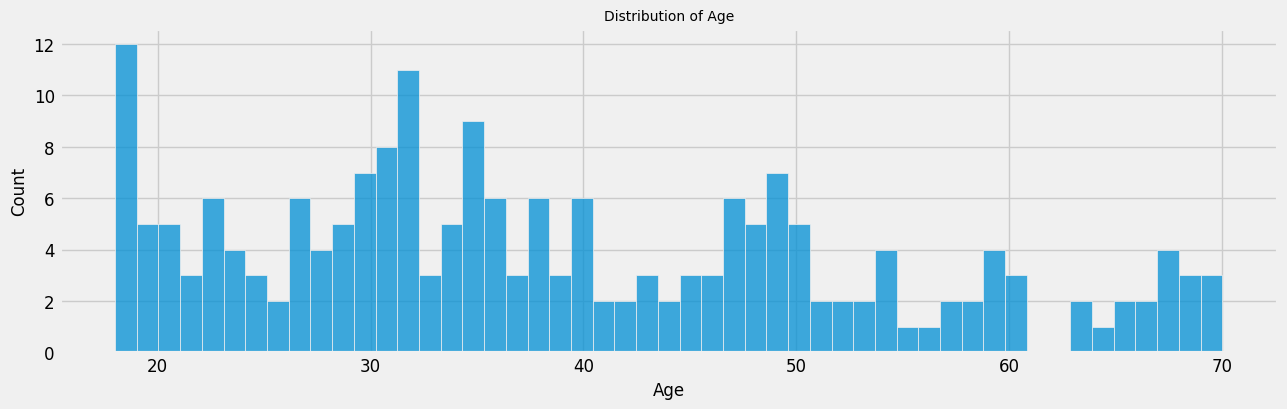

In [ ]:
# Histogram of age
plt.figure(figsize=(14, 4))
sns.histplot(df['Age'], bins=len(df['Age'].unique()), kde=False, palette = 'viridis')
plt.title('Distribution of Age')
plt.show()

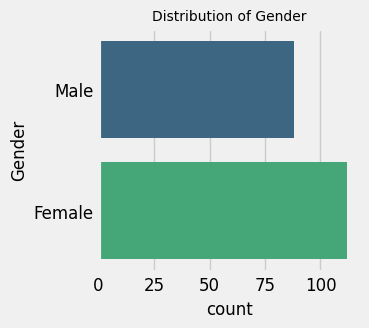

In [ ]:
plt.figure(figsize=(3, 3))
sns.countplot(df['Gender'], palette = 'viridis')
plt.title('Distribution of Gender');

In [ ]:
df['Gender'].value_counts()/df.shape[0]*100

,count
Gender,
Female,56.0
Male,44.0


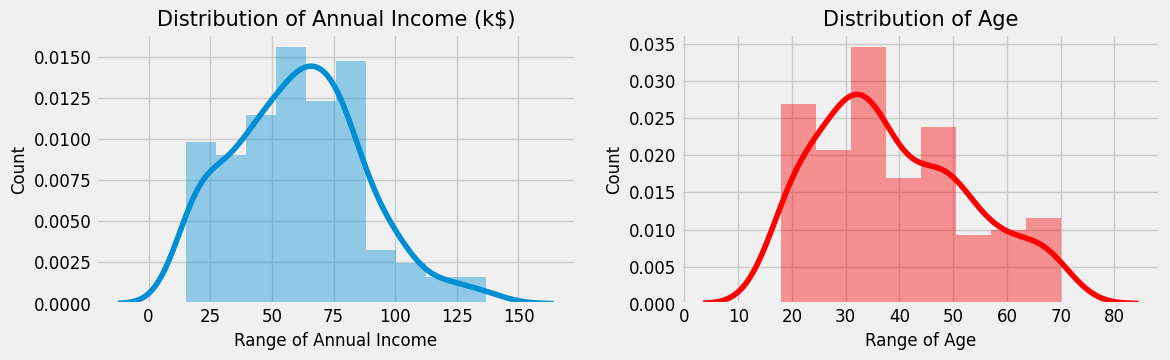

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.distplot(df['Annual Income'])
plt.title('Distribution of Annual Income (k$)', fontsize = 15)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.distplot(df['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 15)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.tight_layout();

Text(0.5, 1.0, 'Distribution of Annual Income (k$)')

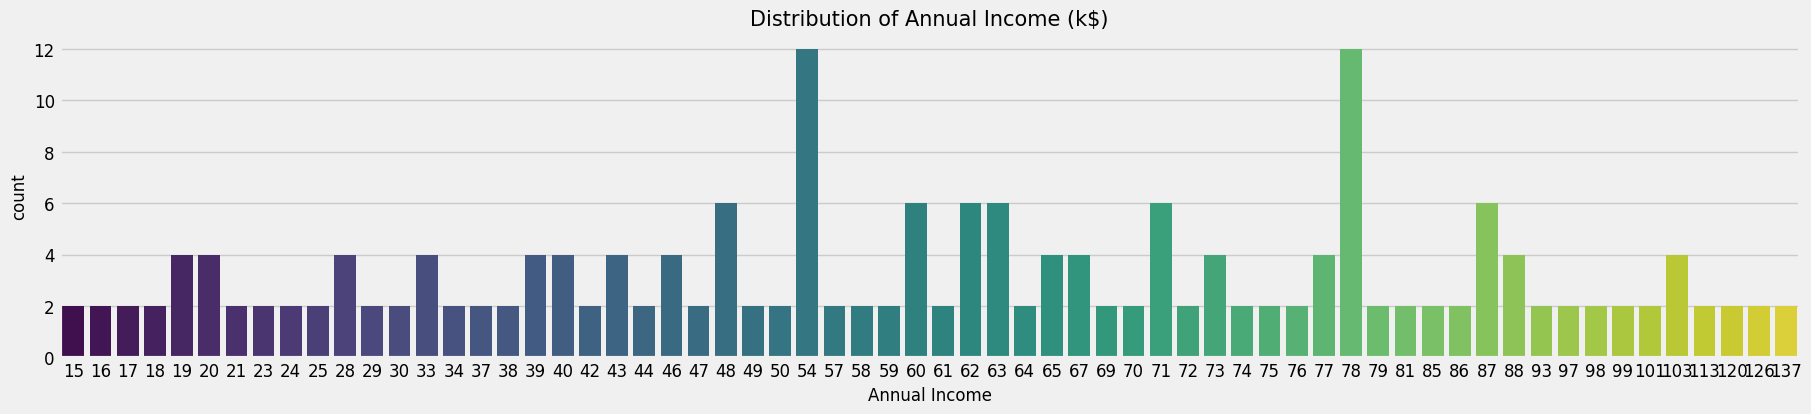

In [ ]:
# Distribution of Annual Income

plt.figure(figsize=(20, 4))
sns.countplot(x='Annual Income', data=df, palette='viridis')
plt.title('Distribution of Annual Income (k$)', fontsize = 15)

Text(0.5, 1.0, 'Spending Score (1-100)')

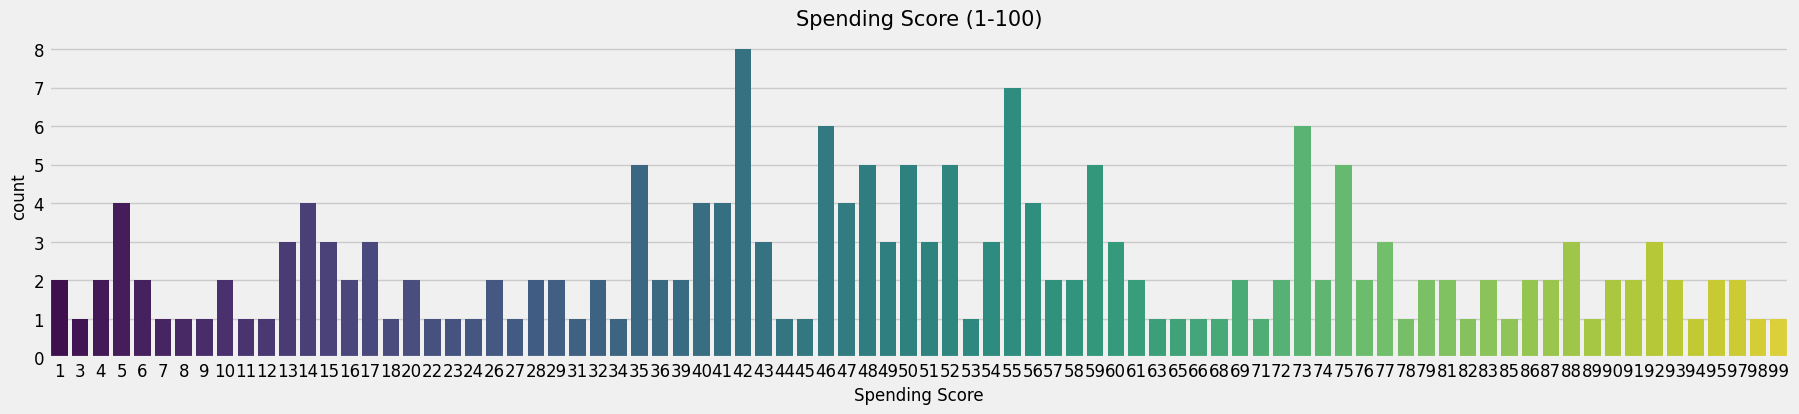

In [ ]:
# Spending Score (1-100)

plt.figure(figsize=(20, 4))
sns.countplot(x='Spending Score', data=df, palette='viridis')
plt.title('Spending Score (1-100)', fontsize = 15)


### **Age vs Annual Income**

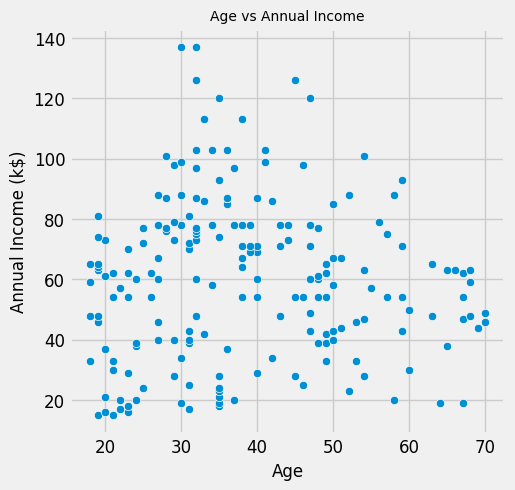

In [ ]:
# Age vs Annual Income
plt.figure(figsize = (5, 5))
sns.scatterplot(
    x = 'Age',
    y = 'Annual Income',
    data = df)

plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income')
plt.show()

### **Age vs Spending Score**

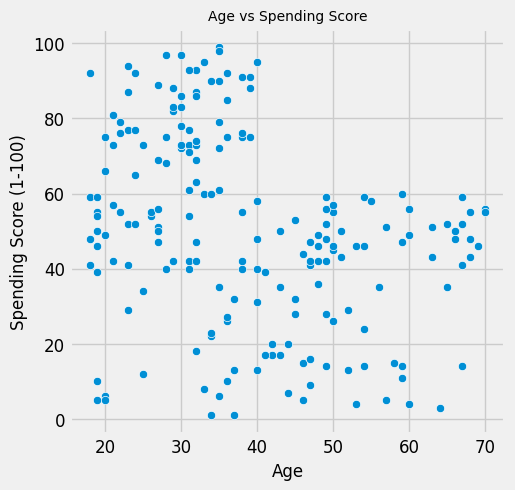

In [ ]:
# Age vs Spending Score
plt.figure(figsize = (5, 5))
sns.scatterplot(
    x = 'Age',
    y = 'Spending Score',
    data = df)

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Age vs Spending Score')
plt.show()

In [ ]:
# Plotly
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
fig = px.scatter_3d(
    df,
    x= 'Annual Income',
    y= 'Spending Score',
    z= 'Age',
)

fig.update_traces(marker_size = 2)

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    paper_bgcolor="white",
)

fig.show()

## **Clustering**

For clustering purposes, the 'Gender' feature will be dropped because it is a categorical feature.

In [ ]:
df = df.drop(columns='Gender', axis=1)
df.head()

,Age,Annual Income,Spending Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


## **Finding the best feature combination**
We will try to select two features for clustering, with the aim of simplifying visualization.

## **Scaling**

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

df_scaled = pd.DataFrame(df_scaled, columns=['Age', 'Annual Income', 'Spending Score'])
df_scaled

,Age,Annual Income,Spending Score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [ ]:
# Find the best feature combination with KMeans (n_clusters=3)

import itertools

silhouette = []
score = 0
thislist = ['Age', 'Annual Income', 'Spending Score']

for i in itertools.combinations(thislist, 2):

    kmeans = KMeans(n_clusters=3)
    kmeans.fit(df_scaled[list(i)])
    labels = kmeans.labels_
    sil = silhouette_score(df_scaled[list(i)], labels, metric = 'euclidean')
    silhouette.append(sil)

    if score < sil:
        best_combination = i
        score = sil

    print(sil, i)

print()
print('best features combinantion is', best_combination, 'with silhouette score:', score)

0.4437863926928188 ('Age', 'Annual Income')
0.4405707703014858 ('Age', 'Spending Score')
0.46658474419000145 ('Annual Income', 'Spending Score')

best features combinantion is ('Annual Income', 'Spending Score') with silhouette score: 0.46658474419000145


## **Finding the best feature combination**
We will try to select two features for clustering, with the aim of simplifying visualization.

In [ ]:
# find the best feature combination with KMeans
X1 = df_scaled[['Age', 'Annual Income']]
X2 = df_scaled[['Age', 'Spending Score']]
X3 = df_scaled[['Annual Income', 'Spending Score']]

cluster_list = [X1, X2, X3]

for i in cluster_list:
    kmeans = KMeans(n_clusters=3)
    kmeans.fit(i)
    labels = kmeans.labels_
    print('Silhoutte score:', silhouette_score(i, labels),'\t', i.columns)
    kmeans.labels_ = 'cluster', i

Silhoutte score: 0.4437863926928188 	 Index(['Age', 'Annual Income'], dtype='object')
Silhoutte score: 0.4405707703014858 	 Index(['Age', 'Spending Score'], dtype='object')
Silhoutte score: 0.46658474419000145 	 Index(['Annual Income', 'Spending Score'], dtype='object')


Because the silhouette score value between 'Annual Income' and 'Spending Score' is the highest, to make visualization easier, only these 2 features will be used for the next clustering process.

In [ ]:
X_scaled = df_scaled[['Annual Income', 'Spending Score']]
X_scaled

,Annual Income,Spending Score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


## **K-Means**

### **Elbow method**

Text(0, 0.5, 'WCSS')

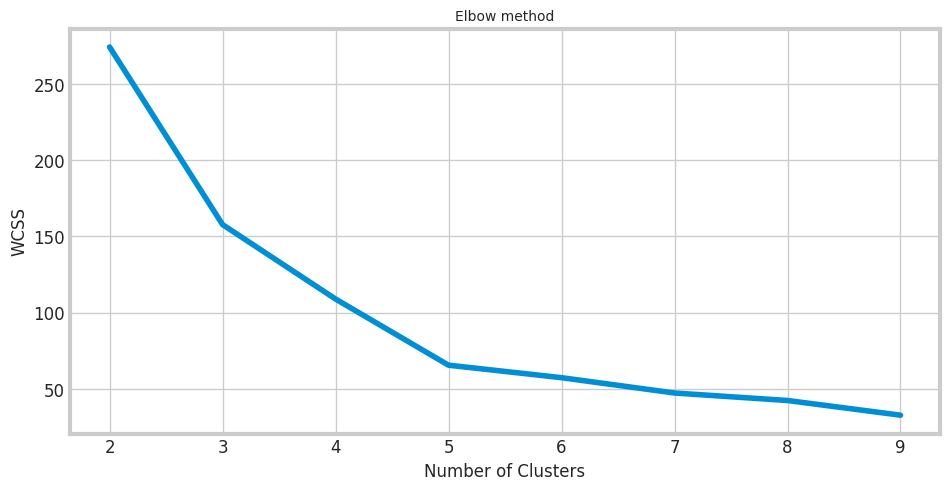

In [ ]:
# model
kmeans_models = [KMeans(n_clusters=k, random_state=0).fit(X_scaled) for k in range (2, 10)]

# inertia (WCSS)
inertia = [model.inertia_ for model in kmeans_models]

sns.set_style(style='whitegrid')
plt.figure(figsize=(10, 5))

plt.plot(range(2, 10), inertia)

plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

### **Silhouette Score**

Text(0, 0.5, 'Silhouette score')

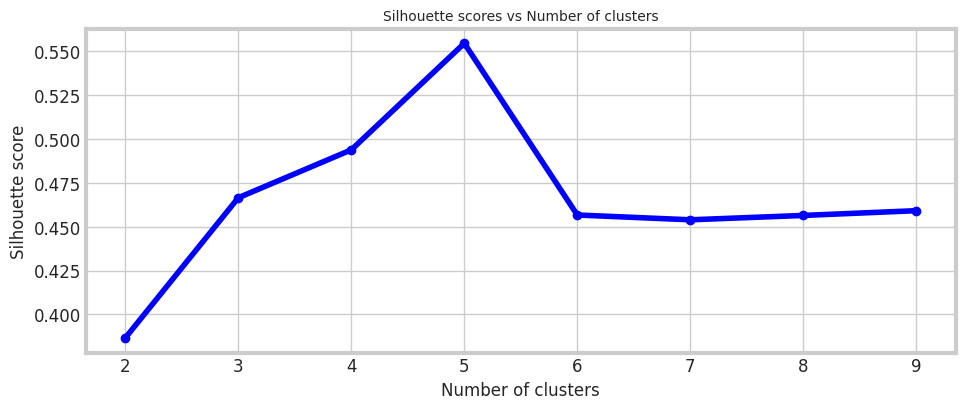

In [ ]:
# Silhouette score
silhoutte = [silhouette_score(X_scaled, model.labels_) for model in kmeans_models]

plt.figure(figsize=(10, 4))

plt.plot(range(2, 10), silhoutte, 'bo-')

plt.xticks(list(np.arange(2,10)))
plt.title('Silhouette scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')

### **Interpretation**

The highest silhouette score is obtained with a cluster count of 5.

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_scaled)

KMeans(n_clusters=5)

In [ ]:
# Checking
kmeans.labels_

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1,
       3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 4, 0, 1, 0, 4, 0, 4, 0,
       1, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0], dtype=int32)

In [ ]:
df['kmeans'] = kmeans.labels_
df

,Age,Annual Income,Spending Score,kmeans
0,19,15,39,3
1,21,15,81,2
2,20,16,6,3
3,23,16,77,2
4,31,17,40,3
...,...,...,...,...
195,35,120,79,0
196,45,126,28,4
197,32,126,74,0
198,32,137,18,4


In [ ]:
print('Silhouette score K-Means:', silhouette_score(X_scaled, kmeans.labels_))

Silhouette score K-Means: 0.5546571631111091


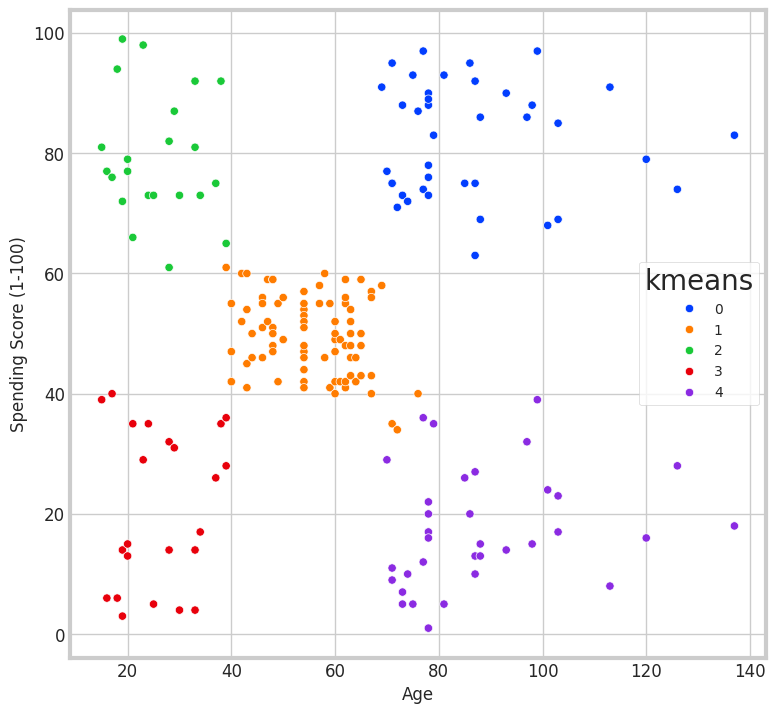

In [ ]:
# Plotting the result
plt.figure(figsize = (8, 8) )
sns.scatterplot(
    x = 'Annual Income',
    y = 'Spending Score',
    hue = 'kmeans',
    data = df,
    palette='bright')

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)');

## **Agglomerative clustering**

Objective:
- Data points within a cluster have similar characteristics
- Characters differ between clusters

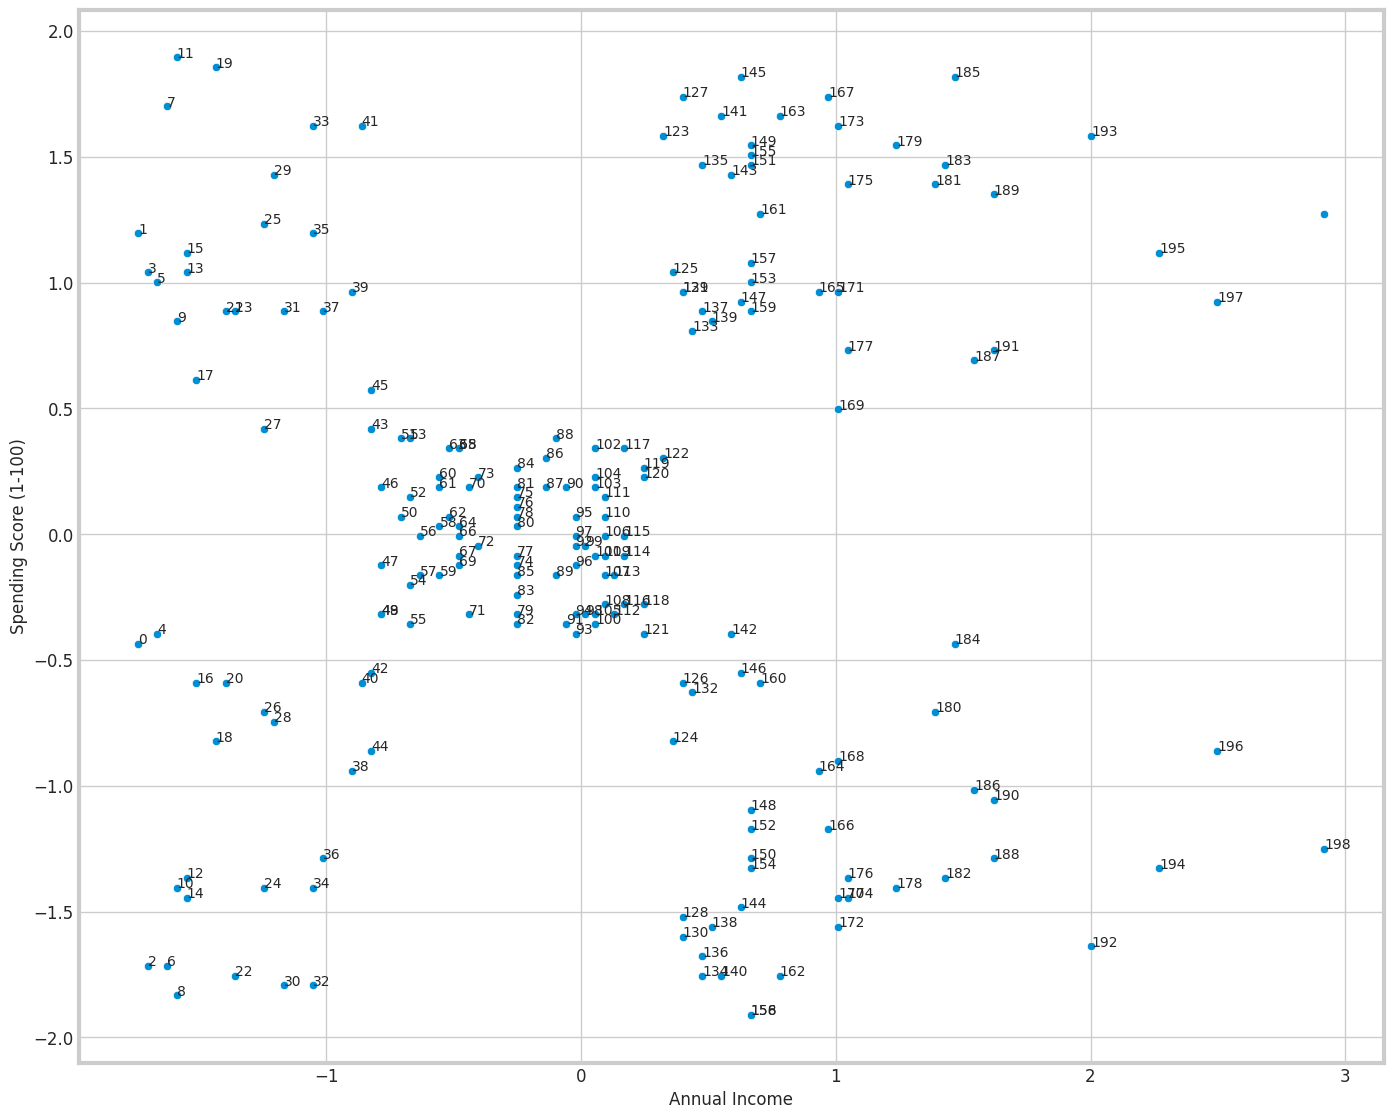

In [ ]:
# scatterplot Age vs Spending Score
plt.figure(figsize=(15, 13))
sns.scatterplot(x='Annual Income', y='Spending Score', data=X_scaled)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')

# number each data point
for i,txt in enumerate(range(0,X_scaled.shape[0]-1)):
    plt.annotate(txt, (X_scaled['Annual Income'][i], X_scaled['Spending Score'][i]), fontsize=10)

### **Ward**
Combining the two clusters with the smallest variance (most uniform)

In [ ]:
# Hierrchical clustering dengan linkage ward
linkage_ward = ward(X_scaled)
linkage_ward[-10:]

array([[353.        , 382.        ,   2.48747181,  49.        ],
       [372.        , 384.        ,   2.69811041,  30.        ],
       [377.        , 381.        ,   3.15032521,  23.        ],
       [383.        , 389.        ,   4.07254633,  85.        ],
       [388.        , 390.        ,   4.30813529,  39.        ],
       [385.        , 386.        ,   4.35442215,  32.        ],
       [391.        , 392.        ,   9.45335291, 108.        ],
       [387.        , 395.        ,  10.14126314, 129.        ],
       [394.        , 396.        ,  15.18618939, 161.        ],
       [393.        , 397.        ,  15.62483742, 200.        ]])

Text(0, 0.5, 'Cluster distance')

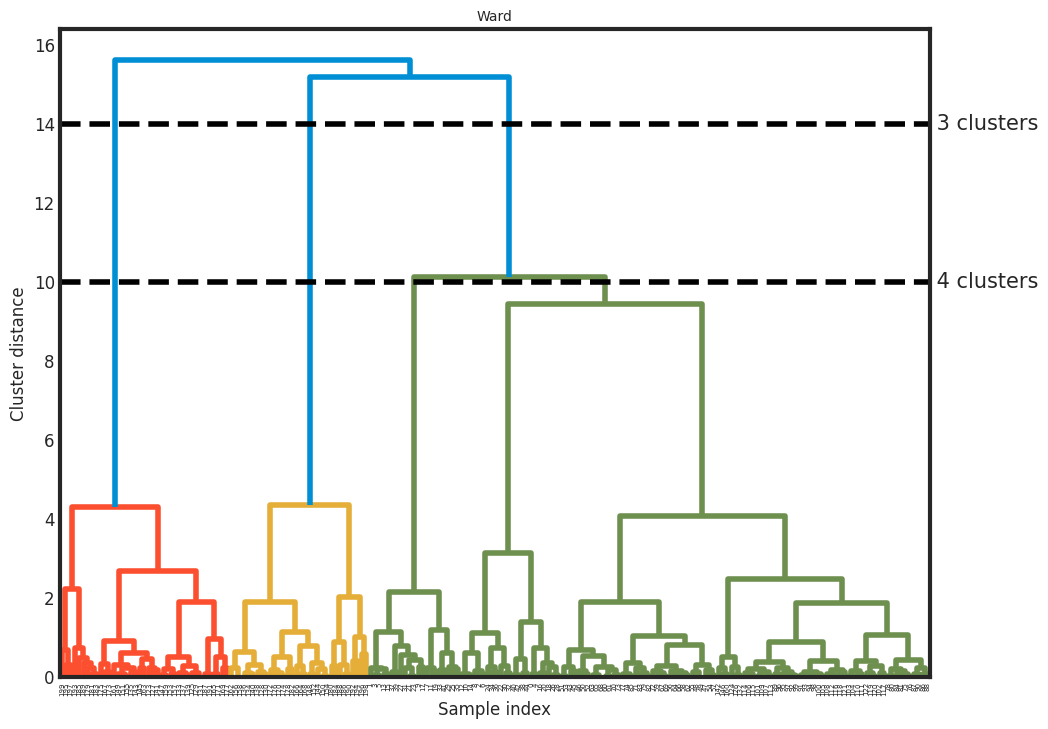

In [ ]:
plt.figure(figsize = (10, 8))
sns.set_style(style='white')

dendrogram(linkage_ward, 25)

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [14, 14], '--', c='k')
ax.plot(bounds, [10, 10], '--', c='k')
ax.text(bounds[1], 14, ' 3 clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 10, ' 4 clusters', va='center', fontdict={'size': 15})
plt.title('Ward')
plt.xlabel('Sample index')
plt.ylabel('Cluster distance')

**Distance Change**
- 2 clusters = 0.4
- 3 clusters = 5.0
- 4 clusters = 0.7
- 5 clusters = 5.1 (3 clusters is optimal)

### **Complete**
Calculates the distance between the furthest data points in different clusters, then combines the ones with the smallest distance.

\* Sensitive to outliers

In [ ]:
# Hierrchical clustering dengan linkage complete
linkage_complete = complete(X_scaled)
linkage_complete[-5:]

array([[370.        , 392.        ,   2.61403624,  39.        ],
       [387.        , 390.        ,   2.86378803, 102.        ],
       [389.        , 395.        ,   3.72686983, 123.        ],
       [393.        , 394.        ,   3.90921424,  77.        ],
       [396.        , 397.        ,   5.50147501, 200.        ]])

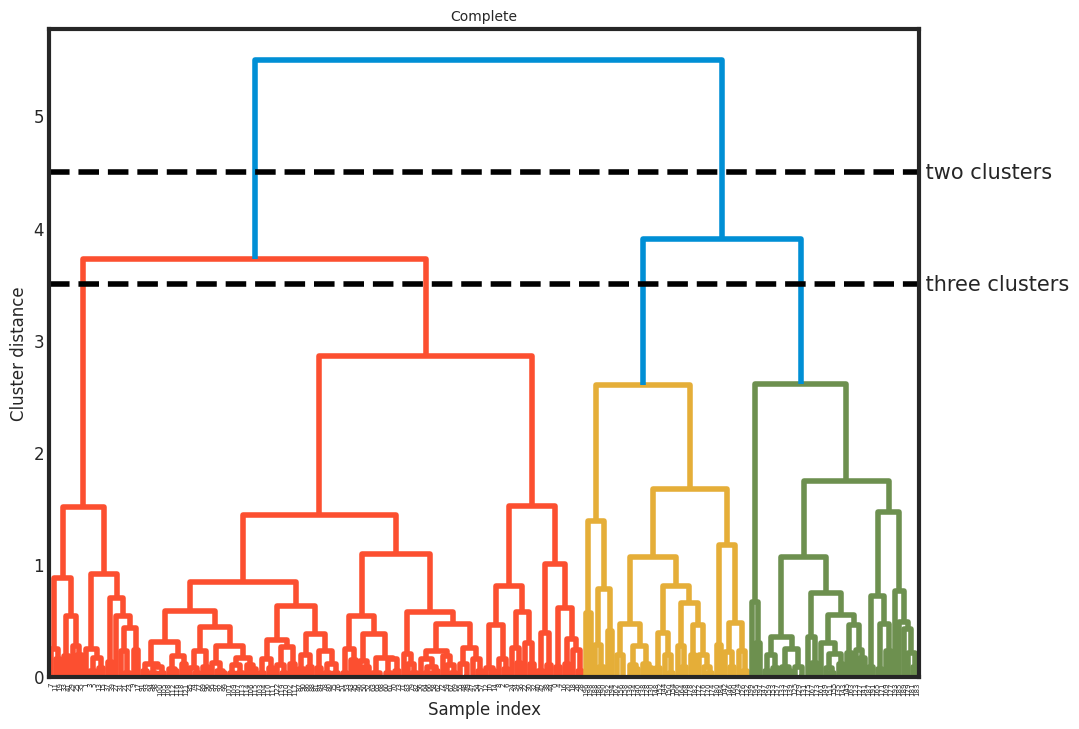

In [ ]:
plt.figure(figsize = (10, 8))
sns.set_style(style='white')

dendrogram(linkage_complete, 25)

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [4.5, 4.5], '--', c='k')
ax.plot(bounds, [3.5, 3.5], '--', c='k')
ax.text(bounds[1], 4.5, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 3.5, ' three clusters', va='center', fontdict={'size': 15})
plt.title('Complete')
plt.xlabel('Sample index')
plt.ylabel('Cluster distance');

**Distance Change**
- 2 clusters = 1.6 (2 clusters is optimal)
- 3 clusters = 0.2
- 4 clusters = 0.9
- 5 clusters = 0.2

### **Average**
Calculates the distance between each data point and data points in other clusters, then averages them. Then, the smallest value is found.

In [ ]:
# Hierrchical clustering dengan linkage average
linkage_average = average(X_scaled)
linkage_average[-8:]

array([[385.        , 387.        ,   1.02172432,  36.        ],
       [377.        , 389.        ,   1.02261282,  34.        ],
       [384.        , 390.        ,   1.64148137, 102.        ],
       [386.        , 392.        ,   1.6659244 ,  38.        ],
       [379.        , 391.        ,   1.76028807,  39.        ],
       [388.        , 393.        ,   1.81715707, 123.        ],
       [394.        , 396.        ,   2.21477378, 161.        ],
       [395.        , 397.        ,   2.31099589, 200.        ]])

Text(0, 0.5, 'Cluster distance')

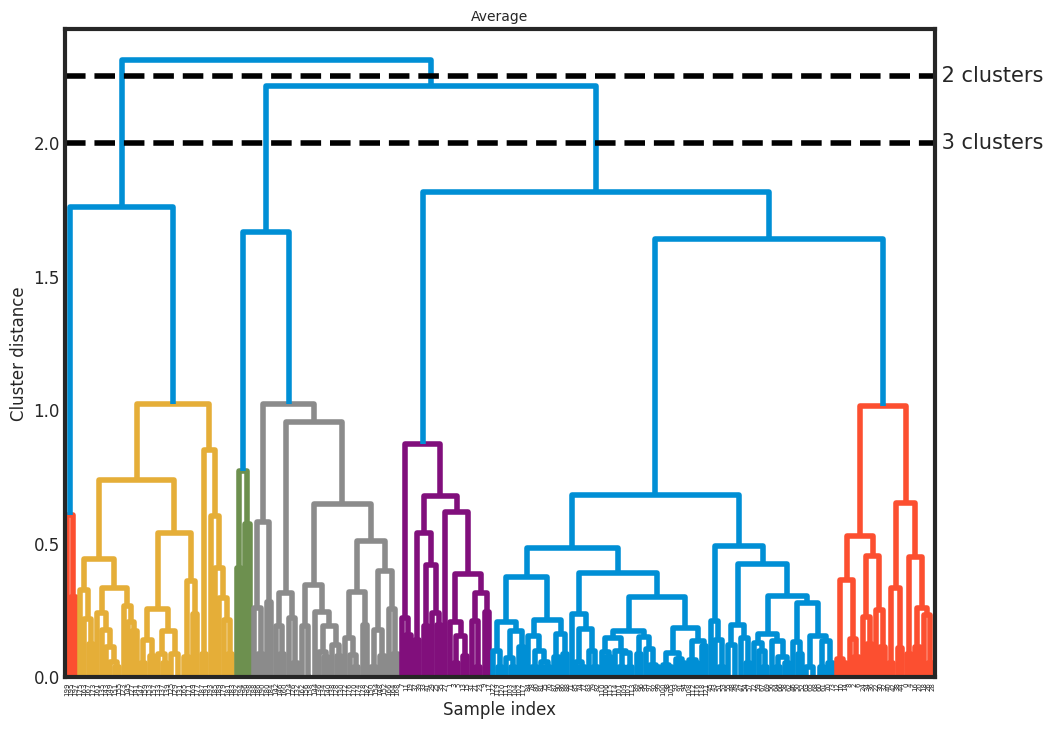

In [ ]:
plt.figure(figsize = (10, 8))
sns.set_style(style='white')

dendrogram(linkage_average, 25)
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [2.25, 2.25], '--', c='k')
ax.plot(bounds, [2, 2], '--', c='k')
ax.text(bounds[1], 2.25, ' 2 clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 2, ' 3 clusters', va='center', fontdict={'size': 15})
plt.title('Average')
plt.xlabel('Sample index')
plt.ylabel('Cluster distance')

**Distance Change**
- 2 clusters = 0.1
- 3 clusters = 0.4 (3 clusters is optimal)
- 4 clusters = 0.06
- 5 clusters = 0.1

### **Results comparison**

**Cluster Number Selection**

- The number of clusters in agglomerative clustering can be chosen subjectively (based on domain knowledge) or by selecting the largest distance change.

- From the dendrogram visualization of the three methods above, we obtain the following candidate methods and clusters:
- Ward: 5 clusters
- Complete: 2 clusters
- Average: 3 clusters

<br>
- Of the three linkage methods used in Hierarchical Clustering on this dataset, the best number of clusters is 2 or 3.
- Using the silhouette score, which method and how many clusters are the best?

In [ ]:
X_scaled

,Annual Income,Spending Score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


In [ ]:
# Comparison of 2 clusters

agg_ward = AgglomerativeClustering(n_clusters=2, linkage='ward')
df['Ward2'] = agg_ward.fit_predict(X_scaled)

agg_complete = AgglomerativeClustering(n_clusters=2, linkage='complete')
df['Complete2'] = agg_complete.fit_predict(X_scaled)

agg_average = AgglomerativeClustering(n_clusters=2, linkage='average')
df['Average2'] = agg_average.fit_predict(X_scaled)

df.head()

,Age,Annual Income,Spending Score,kmeans,Ward2,Complete2,Average2
0,19,15,39,3,0,1,0
1,21,15,81,2,0,1,0
2,20,16,6,3,0,1,0
3,23,16,77,2,0,1,0
4,31,17,40,3,0,1,0


In [ ]:
print('Silhouette score ward 2 clusters:', silhouette_score(X_scaled, df['Ward2']))
print('Silhouette score complete 2 clusters:', silhouette_score(X_scaled, df['Complete2']))
print('Silhouette score average 2 clusters:', silhouette_score(X_scaled, df['Average2']))

Silhouette score ward 2 clusters: 0.3842337621772661
Silhouette score complete 2 clusters: 0.36071083057634323
Silhouette score average 2 clusters: 0.3842337621772661


In [ ]:
# Comparison of 3 clusters

agg_ward = AgglomerativeClustering(n_clusters=3, linkage='ward')
df['Ward3'] = agg_ward.fit_predict(X_scaled)

agg_complete = AgglomerativeClustering(n_clusters=3, linkage='complete')
df['Complete3'] = agg_complete.fit_predict(X_scaled)

agg_average = AgglomerativeClustering(n_clusters=3, linkage='average')
df['Average3'] = agg_average.fit_predict(X_scaled)

df.head()

,Age,Annual Income,Spending Score,kmeans,Ward2,Complete2,Average2,Ward3,Complete3,Average3
0,19,15,39,3,0,1,0,0,0,0
1,21,15,81,2,0,1,0,0,0,0
2,20,16,6,3,0,1,0,0,0,0
3,23,16,77,2,0,1,0,0,0,0
4,31,17,40,3,0,1,0,0,0,0


In [ ]:
print('Silhouette score ward 3 clusters:', silhouette_score(X_scaled, df['Ward3']))
print('Silhouette score complete 3 clusters:', silhouette_score(X_scaled, df['Complete3']))
print('Silhouette score average 3 clusters:', silhouette_score(X_scaled, df['Average3']))

Silhouette score ward 3 clusters: 0.4610481446570447
Silhouette score complete 3 clusters: 0.46658474419000145
Silhouette score average 3 clusters: 0.46658474419000145


In [ ]:
# Comparison of 5 clusters

agg_ward = AgglomerativeClustering(n_clusters=5, linkage='ward')
df['Ward5'] = agg_ward.fit_predict(X_scaled)

agg_complete = AgglomerativeClustering(n_clusters=5, linkage='complete')
df['Complete5'] = agg_complete.fit_predict(X_scaled)

agg_average = AgglomerativeClustering(n_clusters=5, linkage='average')
df['Average5'] = agg_average.fit_predict(X_scaled)

df.head()

,Age,Annual Income,Spending Score,kmeans,Ward2,Complete2,Average2,Ward3,Complete3,Average3,Ward5,Complete5,Average5
0,19,15,39,3,0,1,0,0,0,0,4,1,1
1,21,15,81,2,0,1,0,0,0,0,3,3,3
2,20,16,6,3,0,1,0,0,0,0,4,1,1
3,23,16,77,2,0,1,0,0,0,0,3,3,3
4,31,17,40,3,0,1,0,0,0,0,4,1,1


In [ ]:
print('Silhouette score ward 5 clusters:', silhouette_score(X_scaled, df['Ward5']))
print('Silhouette score complete 5 clusters:', silhouette_score(X_scaled, df['Complete5']))
print('Silhouette score average 5 clusters:', silhouette_score(X_scaled, df['Average5']))

Silhouette score ward 5 clusters: 0.5538089226688662
Silhouette score complete 5 clusters: 0.5531118656926701
Silhouette score average 5 clusters: 0.4794263081846086


In [ ]:
pd.DataFrame({'Total Cluster': ['2 Clusters', '3 Clusters', '5 Clusters'],
    'Ward': [silhouette_score(X_scaled, df['Ward2']), silhouette_score(X_scaled, df['Ward3']), silhouette_score(X_scaled, df['Ward5'])],
    'Complete': [silhouette_score(X_scaled, df['Complete2']), silhouette_score(X_scaled, df['Complete3']), silhouette_score(X_scaled, df['Complete5'])],
    'Average': [silhouette_score(X_scaled, df['Average2']), silhouette_score(X_scaled, df['Average3']), silhouette_score(X_scaled, df['Average5'])]
})

,Total Cluster,Ward,Complete,Average
0,2 Clusters,0.384234,0.360711,0.384234
1,3 Clusters,0.461048,0.466585,0.466585
2,5 Clusters,0.553809,0.553112,0.479426


In [ ]:
print('Silhouette score Hierarchical Clustering with Average Linkage 3 cluster:', silhouette_score(X_scaled, df['Ward5']))
# using 3 clusters based on the dendogram

Silhouette score Hierarchical Clustering with Average Linkage 3 cluster: 0.5538089226688662


### **Interpretation**

Based on the hierarchical/agglomerative clustering method, it was found that the average linkage with two clusters is the most optimal for customer segmentation in this case.

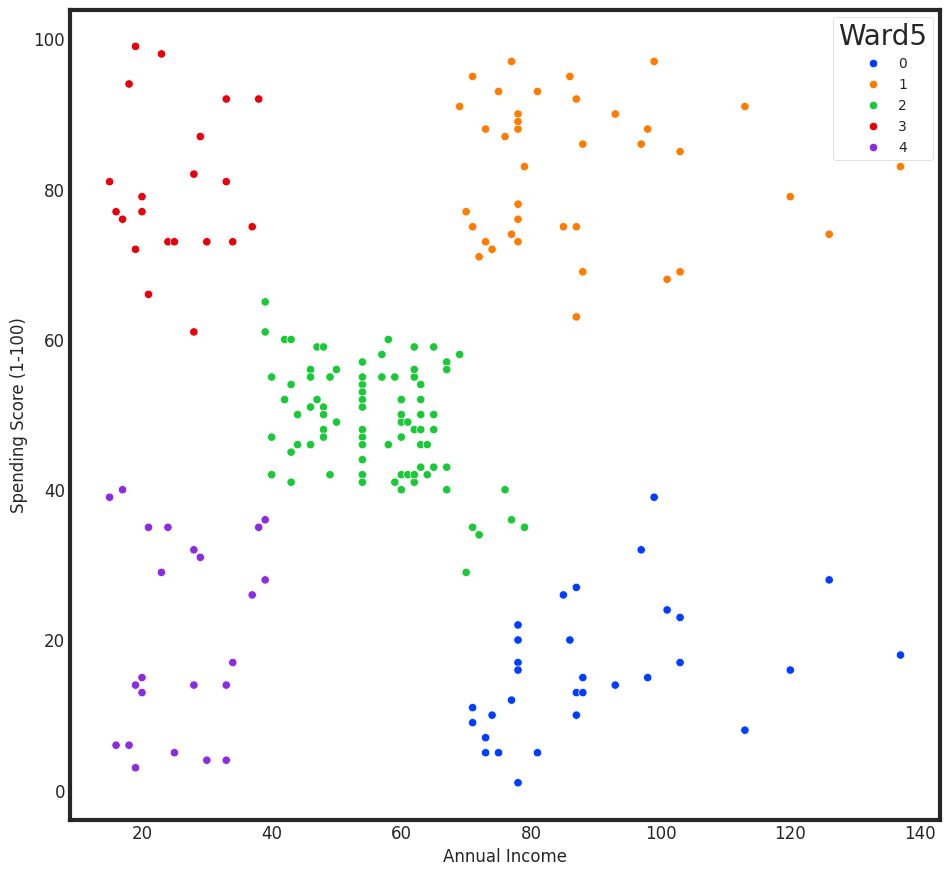

In [ ]:
# Plot Average
plt.figure(figsize = (10, 10))
sns.scatterplot(
    x = 'Annual Income',
    y = 'Spending Score',
    hue = 'Ward5',
    data = df,
    palette='bright')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)');

## **DBScan**

Pros of DBSCAN
- No need to specify the number of clusters upfront
- Can identify outliers
- Can capture certain (irregular) patterns

Cons of DBSCAN
- Difficulty identifying clusters in data with highly variable densities
- Poor performance on high-dimensional data
- Sensitive to epsilon and min_samples

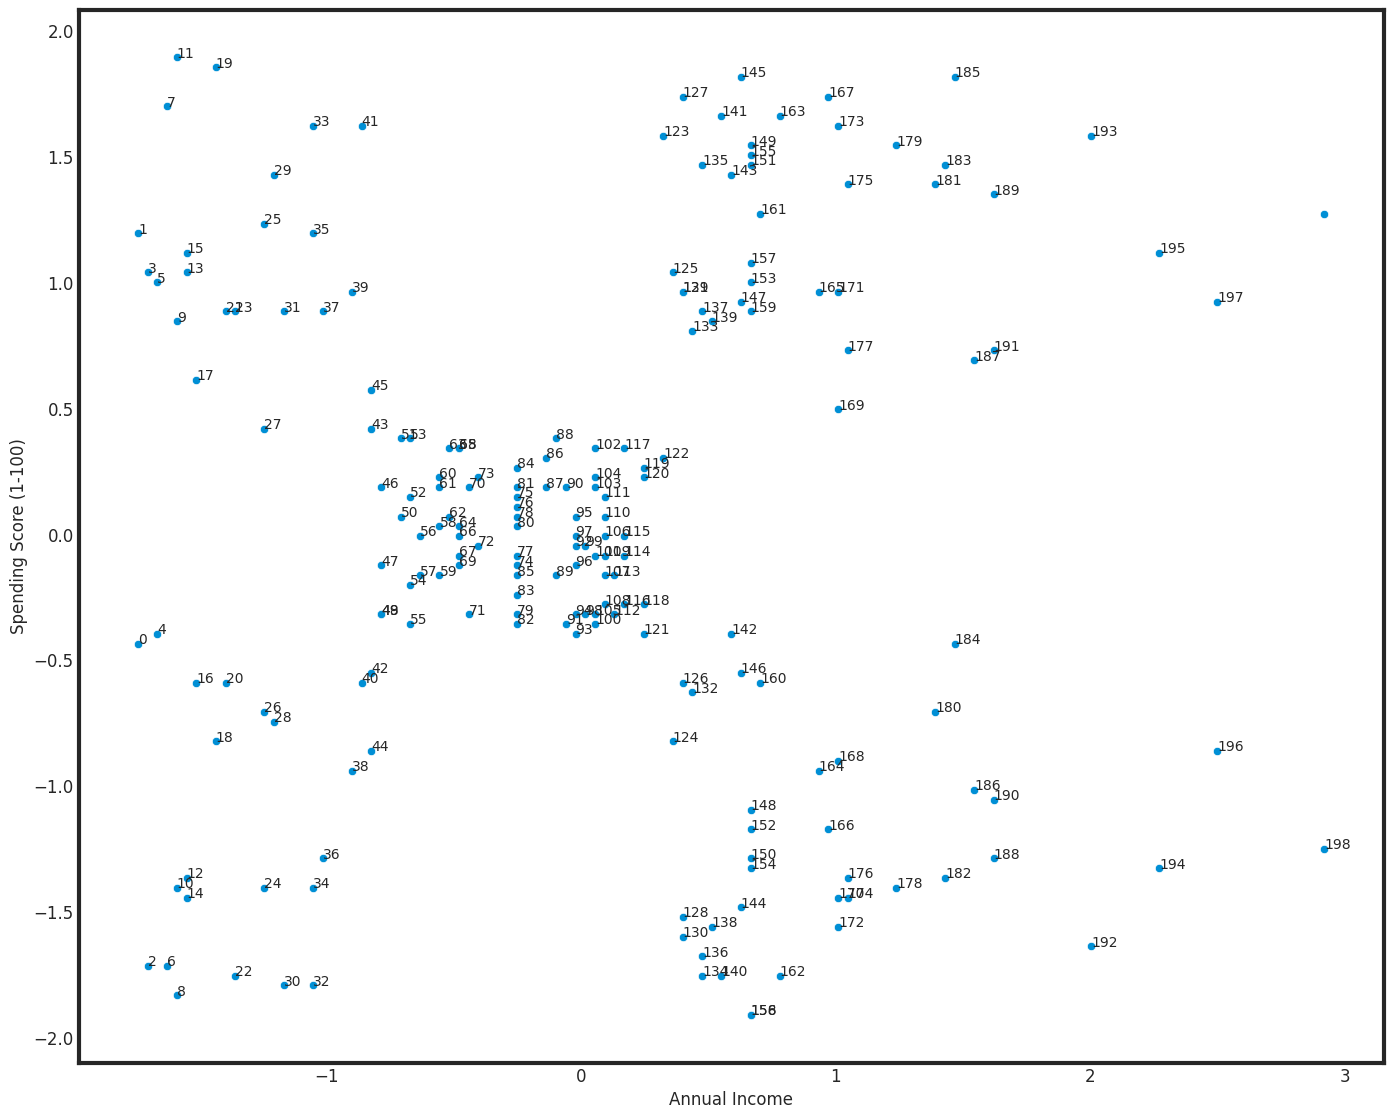

In [ ]:
plt.figure(figsize=(15, 13))
sns.scatterplot(x='Annual Income', y='Spending Score', data=X_scaled)

plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')

for i,txt in enumerate(range(0,X_scaled.shape[0]-1)):
    plt.annotate(txt, (X_scaled['Annual Income'][i], X_scaled['Spending Score'][i]), fontsize=10)

**Optimizing epsilon & min_samples**

In [ ]:
dbscan = DBSCAN(eps=0.2, min_samples=3)
labels = dbscan.fit_predict(X_scaled)
labels

array([-1,  1,  0,  1, -1,  1,  0,  3,  0,  1,  2,  3,  2,  1,  2,  1,  4,
       -1, -1,  3,  4,  1,  6,  1,  7,  5,  4, -1,  4,  5,  6,  1,  6, -1,
        7,  5,  7,  1, -1,  1, -1, -1, -1,  8, -1,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  9, -1,  9, -1,  9, 10,  9, 10,  9, -1,  9, 10,  9,
       10,  9, 10,  9, 10,  9, 11,  9, 10,  9, 11,  9, 10,  9, 10,  9, 10,
        9, 10,  9, 10,  9, 10,  9, 11,  9, 10,  9, -1, -1, -1, -1, -1, -1,
       12, -1, 12, -1, 12, -1, 12, -1, 12, -1, -1, -1, 12, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [ ]:
list_eps = [0.2, 0.3, 0.4, 0.5]
list_min_samples = [4,5,6,7]

list_sil = []
epsilon = []
min_sam = []
member = []
n_member = []


for eps in list_eps:
    for min_samples in list_min_samples:

        # epsilon
        print('Epsilon', eps)
        epsilon.append(eps)

        # min_samples
        print('min_samples', min_samples)
        min_sam.append(min_samples)

        # fitting and labeling
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        label_dbscan = dbscan.fit_predict(X_scaled)

        # silhoutte score
        list_sil.append(silhouette_score(X_scaled, label_dbscan))
        print('score: ', silhouette_score(X_scaled, label_dbscan))

        # cluster member
        print(np.unique(label_dbscan))
        print(np.bincount(label_dbscan+1))

        member.append(np.unique(label_dbscan))
        n_member.append(np.bincount(label_dbscan+1))

        print()




Epsilon 0.2
min_samples 4
score:  0.19685111632552818
[-1  0  1  2  3  4]
[73  7 79 21 14  6]

Epsilon 0.2
min_samples 5
score:  0.14057942679617558
[-1  0  1  2  3  4  5  6]
[77  6 78 11  9 10  4  5]

Epsilon 0.2
min_samples 6
score:  0.09644483815713827
[-1  0  1  2  3]
[95 78 10  9  8]

Epsilon 0.2
min_samples 7
score:  0.05559332249286136
[-1  0  1  2  3]
[100  78   8   7   7]

Epsilon 0.3
min_samples 4
score:  0.38427960728258165
[-1  0  1  2  3  4  5  6  7]
[23 16  8  7 88 32 14  9  3]

Epsilon 0.3
min_samples 5
score:  0.31614121976731185
[-1  0  1  2  3  4  5  6]
[35 12  5  7 88 30 14  9]

Epsilon 0.3
min_samples 6
score:  0.24983531622925184
[-1  0  1  2  3  4  5]
[48 10  6 87 26 14  9]

Epsilon 0.3
min_samples 7
score:  0.23146493255355374
[-1  0  1  2  3]
[72 10 82 24 12]

Epsilon 0.4
min_samples 4
score:  0.39828449401818633
[-1  0  1  2]
[ 14 126  33  27]

Epsilon 0.4
min_samples 5
score:  0.41325830390002166
[-1  0  1  2  3]
[ 15 115  11  32  27]

Epsilon 0.4
min_samples 

In [ ]:
dbscan_result = pd.DataFrame({
    'epsilon':epsilon,
    'min_samples':min_sam,
    'member': member,
    'n_member': n_member,
    'sil score': list_sil
})

dbscan_result.sort_values('sil score')

,epsilon,min_samples,member,n_member,sil score
3,0.2,7,"[-1, 0, 1, 2, 3]","[100, 78, 8, 7, 7]",0.055593
2,0.2,6,"[-1, 0, 1, 2, 3]","[95, 78, 10, 9, 8]",0.096445
1,0.2,5,"[-1, 0, 1, 2, 3, 4, 5, 6]","[77, 6, 78, 11, 9, 10, 4, 5]",0.140579
0,0.2,4,"[-1, 0, 1, 2, 3, 4]","[73, 7, 79, 21, 14, 6]",0.196851
7,0.3,7,"[-1, 0, 1, 2, 3]","[72, 10, 82, 24, 12]",0.231465
6,0.3,6,"[-1, 0, 1, 2, 3, 4, 5]","[48, 10, 6, 87, 26, 14, 9]",0.249835
5,0.3,5,"[-1, 0, 1, 2, 3, 4, 5, 6]","[35, 12, 5, 7, 88, 30, 14, 9]",0.316141
13,0.5,5,"[-1, 0, 1]","[8, 157, 35]",0.350446
12,0.5,4,"[-1, 0, 1]","[8, 157, 35]",0.350446
15,0.5,7,"[-1, 0, 1]","[12, 154, 34]",0.352615


### **Interpretation**

From various combinations of epsilon and min_samples, the best possible choice is:
- eps = 0.4 & min_samples = 5, silhouette score 0.413. There are 15 noise levels.

In [ ]:
# Fit DBScan
dbscan = DBSCAN(eps=0.4, min_samples=5)
clusters_dbs = dbscan.fit_predict(X_scaled)

print('cluster: \n',clusters_dbs)

cluster: 
 [ 0  0  1  0  0  0  1 -1  1  0  1 -1  1  0  1  0  0  0  0 -1  0  0  1  0
  1  0  0  0  0  0  1  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  2  0  2  0  2  3  2  3  2  0  2  3  2  3  2  3  2  3  2  0  2
  3  2  0  2  3  2  3  2  3  2  3  2  3  2  3  2  0  2  3  2  3  2  3  2
  3 -1  3  2  3  2  3  2  3  2  3  2  3  2  3  2 -1  2  3 -1  3  2  3 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


In [ ]:
print('Silhouette score DBScan:', silhouette_score(X_scaled, clusters_dbs))

Silhouette score DBScan: 0.41325830390002166


In [ ]:
df['DBSCAN'] = dbscan.labels_
df.head(10)

,Age,Annual Income,Spending Score,kmeans,Ward2,Complete2,Average2,Ward3,Complete3,Average3,Ward5,Complete5,Average5,DBSCAN
0,19,15,39,3,0,1,0,0,0,0,4,1,1,0
1,21,15,81,2,0,1,0,0,0,0,3,3,3,0
2,20,16,6,3,0,1,0,0,0,0,4,1,1,1
3,23,16,77,2,0,1,0,0,0,0,3,3,3,0
4,31,17,40,3,0,1,0,0,0,0,4,1,1,0
5,22,17,76,2,0,1,0,0,0,0,3,3,3,0
6,35,18,6,3,0,1,0,0,0,0,4,1,1,1
7,23,18,94,2,0,1,0,0,0,0,3,3,3,-1
8,64,19,3,3,0,1,0,0,0,0,4,1,1,1
9,30,19,72,2,0,1,0,0,0,0,3,3,3,0


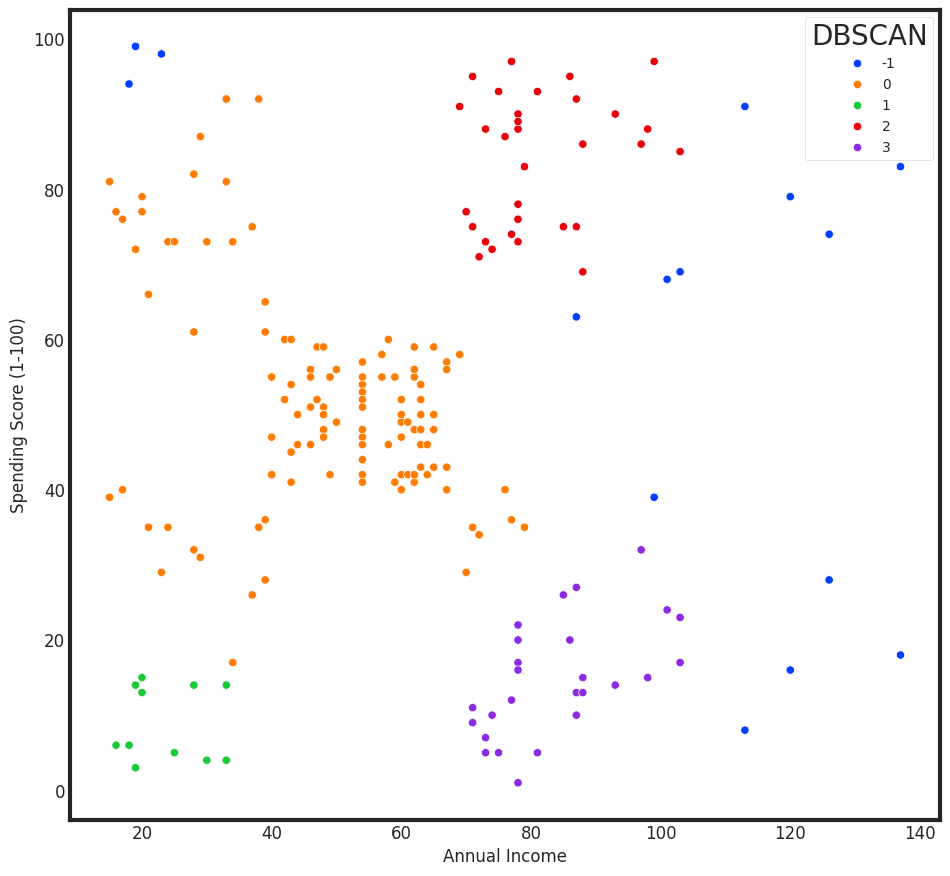

In [ ]:
# DBScan
plt.figure(figsize = (10, 10))
# sns.set_context(context = 'notebook', font_scale=1.5)
sns.scatterplot(
    x = 'Annual Income',
    y = 'Spending Score',
    hue = 'DBSCAN',
    data = df,
    palette='bright')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)');

## **Summary**

In the case of customer segmentation using two features, namely 'Age' and 'Spending Score,' the K-Means method produced the most optimal clustering results, based on the silhouette score obtained.

Silhouette score:
- Kmeans 5 clusters = 0.55
- Hierarchical (Ward) 5 clusters = 0.55
- DBSCAN 4 clusters = 0.41

In [ ]:
df.head(3)

,Age,Annual Income,Spending Score,kmeans,Ward2,Complete2,Average2,Ward3,Complete3,Average3,Ward5,Complete5,Average5,DBSCAN
0,19,15,39,3,0,1,0,0,0,0,4,1,1,0
1,21,15,81,2,0,1,0,0,0,0,3,3,3,0
2,20,16,6,3,0,1,0,0,0,0,4,1,1,1


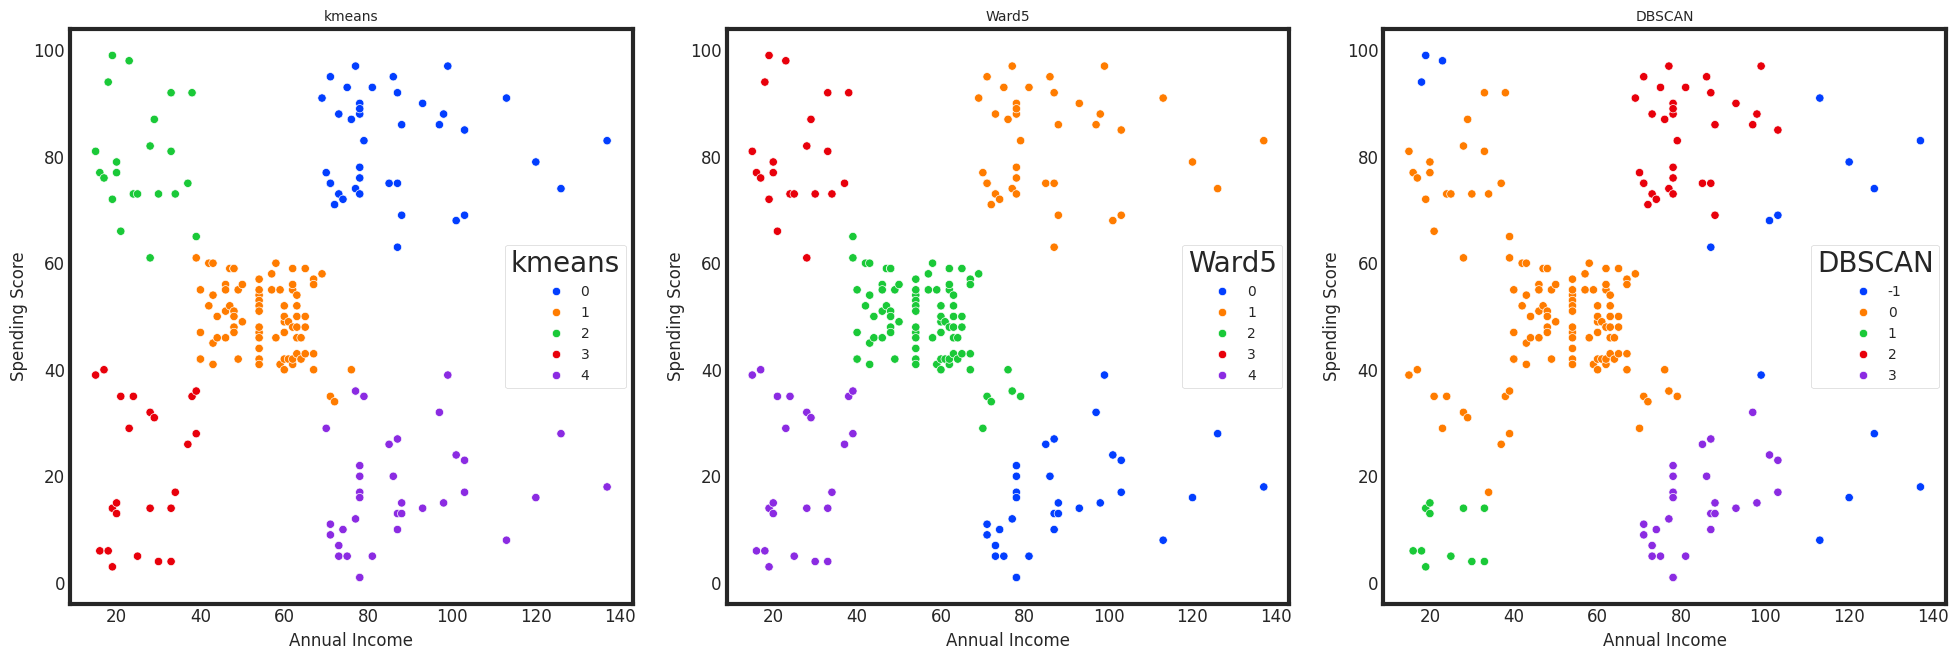

In [ ]:
# Plotting the result
plt.figure(figsize = (20, 7))
# sns.set_context(context = 'notebook', font_scale=1.5)

list_model = ['kmeans', 'Ward5', 'DBSCAN']
plot_number = 1

for model in list_model:

    plt.subplot(1,3, plot_number)
    sns.scatterplot(
        x = 'Annual Income',
        y = 'Spending Score',
        hue = model,
        data = df,
        palette='bright')

    plt.title(model)

    plot_number += 1

plt.tight_layout()
plt.show()


We can use Kmeans clustering as the best result.

Five clusters were formed:
1. Cluster 0: medium income, medium spending
2. Cluster 1: low income, high spending
3. Cluster 2: low income, low spending
4. Cluster 3: high income, high spending
5. Cluster 4: high income, low spending